# Evaluation of AI/ML Salaries

## Reading the Dataset

In [3]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
# configs
def_color = 'darkblue'

In [5]:
# load file + show structure
data = pd.read_csv(r'C:\Users\sagar\coding\ann class\salaries.csv')

In [6]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [7]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1190,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
1191,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
1192,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
1193,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
1194,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


### Data Pre-Processing

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1195 non-null   int64 
 1   experience_level    1195 non-null   object
 2   employment_type     1195 non-null   object
 3   job_title           1195 non-null   object
 4   salary              1195 non-null   int64 
 5   salary_currency     1195 non-null   object
 6   salary_in_usd       1195 non-null   int64 
 7   employee_residence  1195 non-null   object
 8   remote_ratio        1195 non-null   int64 
 9   company_location    1195 non-null   object
 10  company_size        1195 non-null   object
dtypes: int64(4), object(7)
memory usage: 102.8+ KB


In [9]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1195.000000,1.195000e+03,1195.000000,1195.000000
mean,2021.684519,2.495210e+05,122041.142259,66.736402
std,0.584604,1.136720e+06,66487.800833,44.035085
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2021.000000,8.000000e+04,73961.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.755500e+05,160237.500000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


In [10]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
#data.experience_level=data.experience_level.map({'EN':1,'MI':2,'SE':3,'EX':4})
#data.employment_type = data.employment_type.map({'PT':1,'FT':2,'CT':3,'FL':4})
#data.company_size = data.company_size.map({'S':1,'M':2,'L':3})

In [12]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


### Data Visualization

In [13]:
# define categorical features
features_cat = ['work_year', 'experience_level', 'employment_type', 'job_title',
                'employee_residence', 'company_location', 'company_size']

### Plotting 

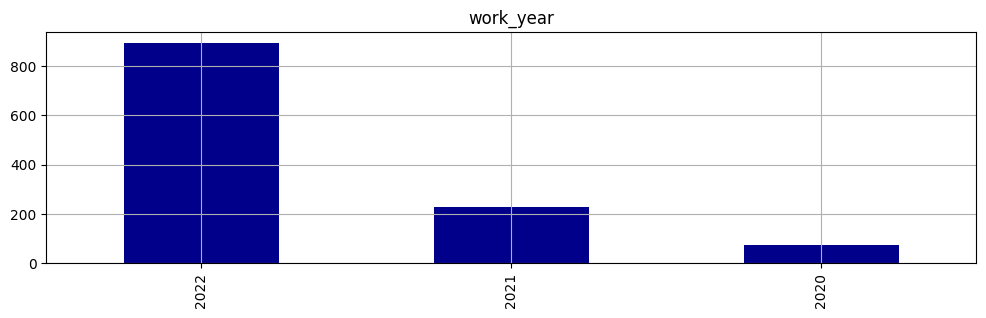

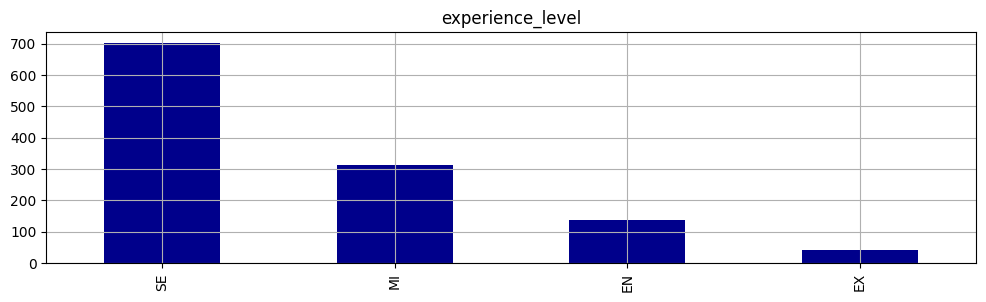

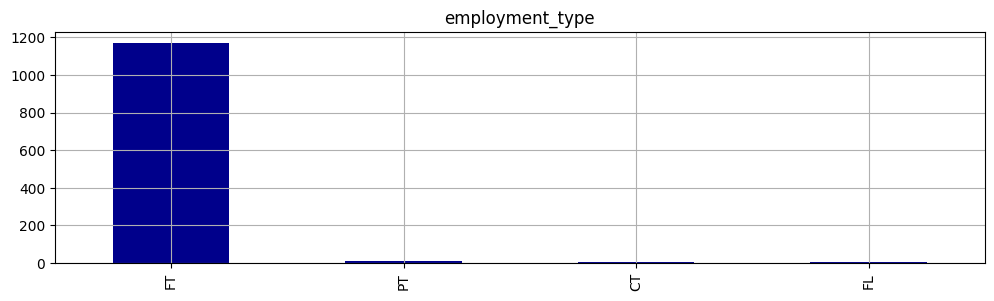

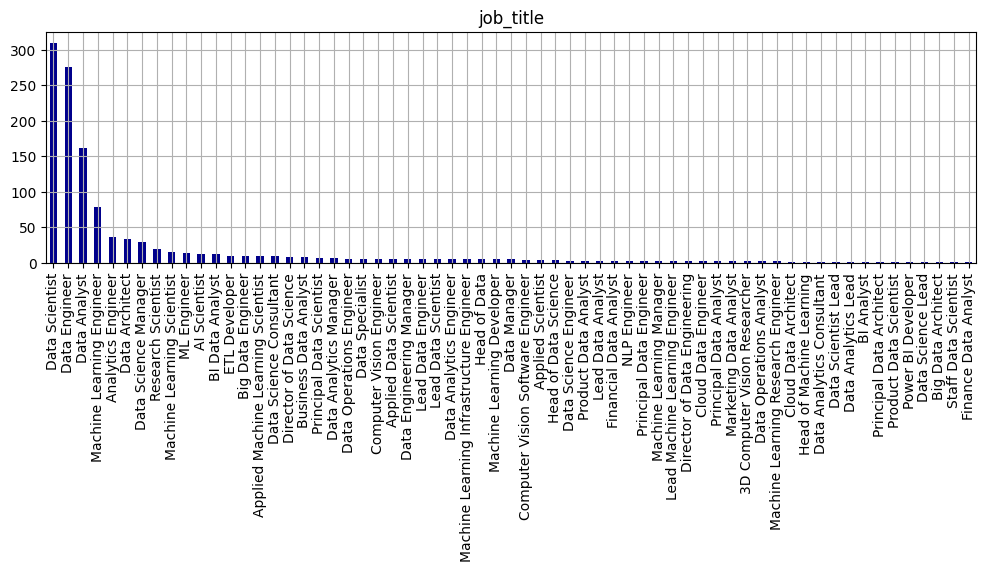

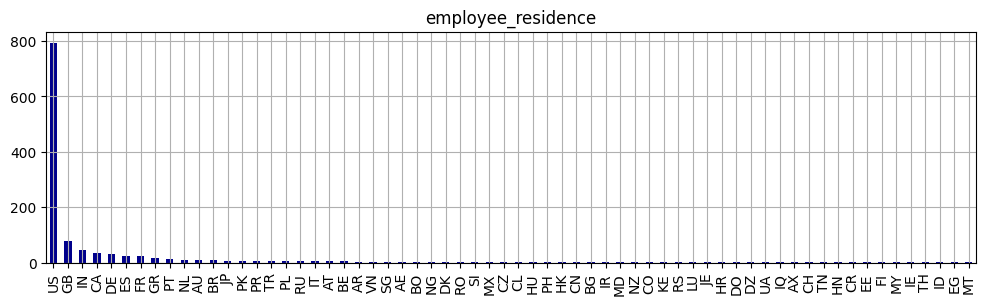

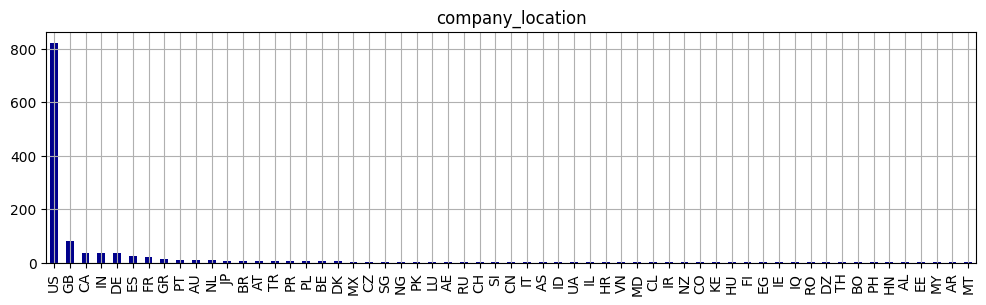

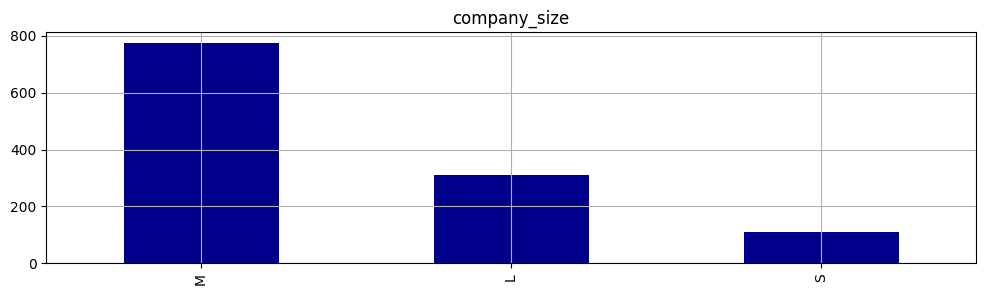

In [14]:
for f in features_cat:
    plt.figure(figsize=(12,3))
    data[f].value_counts().plot(kind='bar', color=def_color)
    plt.title(f)
    plt.grid()
    plt.show()

In [15]:
# select subset
data_select = data[(data.work_year==2022) & 
               (data.employment_type=='FT') & 
               (data.company_location=='US')]

print('Size of selection:', data_select.shape)

# adjust relevant features
features_cat_select = ['experience_level', 'job_title',
                       'employee_residence', 'company_size']

Size of selection: (690, 11)


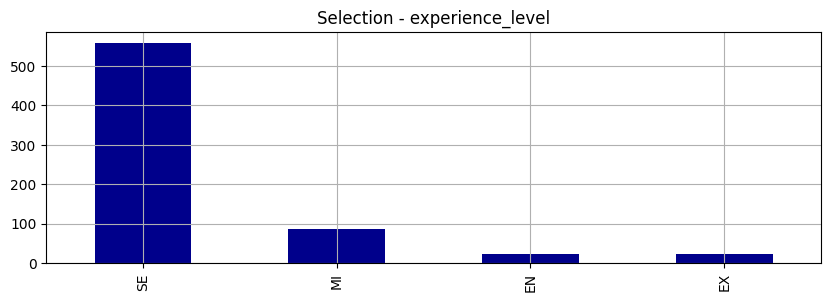

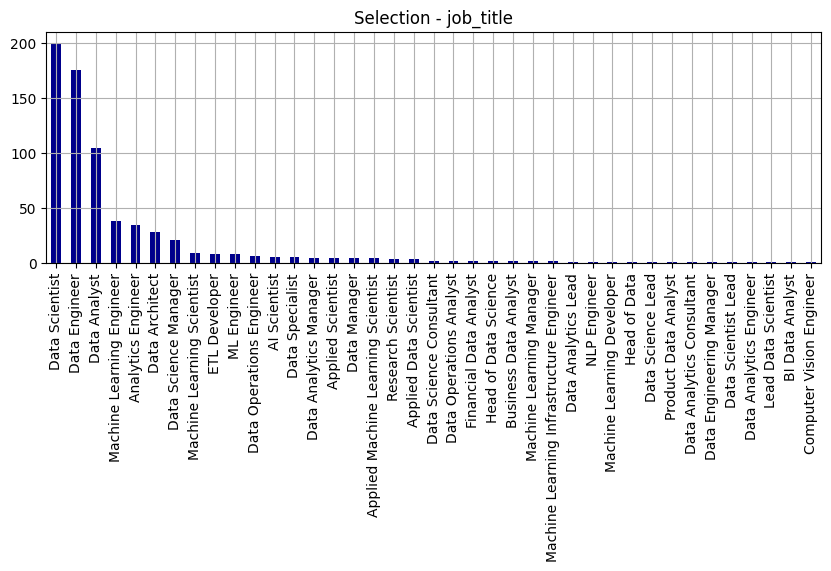

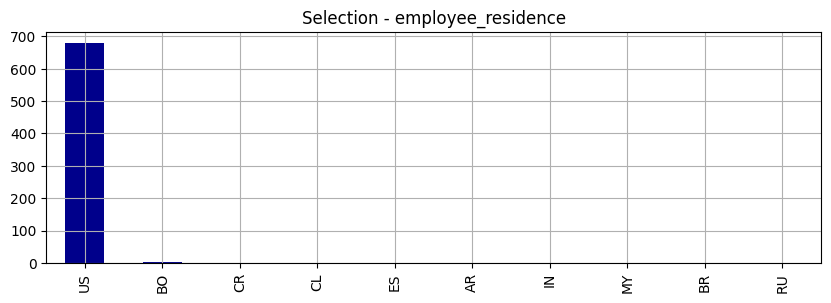

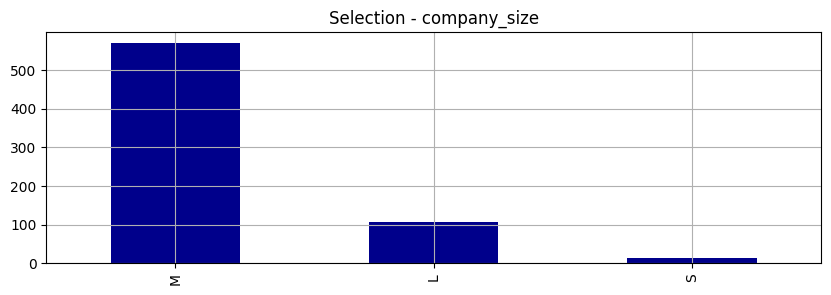

In [16]:
# plot feature distributions for selected subset
for f in features_cat_select:
    plt.figure(figsize=(10,3))
    data_select[f].value_counts().plot(kind='bar', color=def_color)
    plt.title('Selection - ' + f)
    plt.grid()
    plt.show()

In [17]:
# a few people in our selection work from abroad (employee_residence != US), let's check
data_select.employee_residence.value_counts()

US    680
BO      2
CR      1
CL      1
ES      1
AR      1
IN      1
MY      1
BR      1
RU      1
Name: employee_residence, dtype: int64

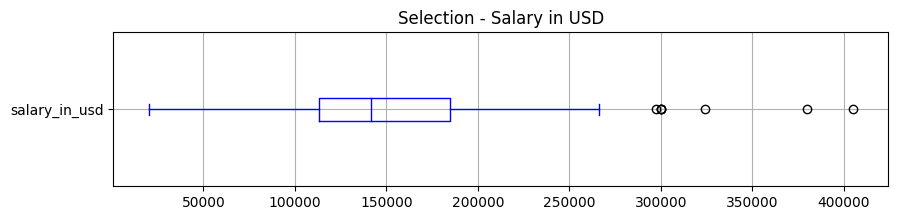

In [18]:
plt.figure(figsize=(10,2))
data_select.salary_in_usd.plot(kind='box', vert=False, color='blue')
plt.title('Selection - Salary in USD')
plt.grid()
plt.show()

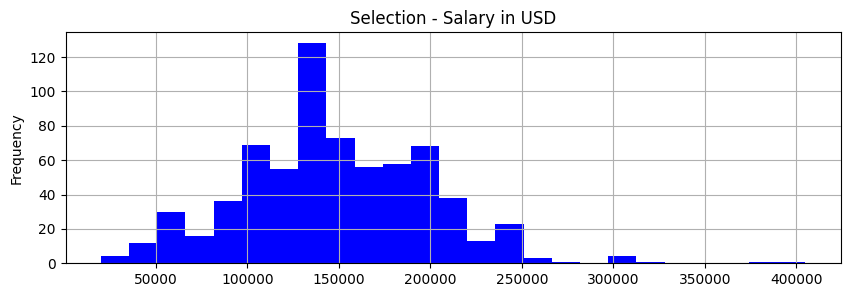

In [19]:
# plot distribution of salary (in USD)
plt.figure(figsize=(10,3))
data_select.salary_in_usd.plot(kind='hist', bins=25, color='blue')
plt.title('Selection - Salary in USD')
plt.grid()
plt.show()

C:\Users\sagar\AppData\Local\Temp\ipykernel_3036\1003717165.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=data.corr()


<Axes: >

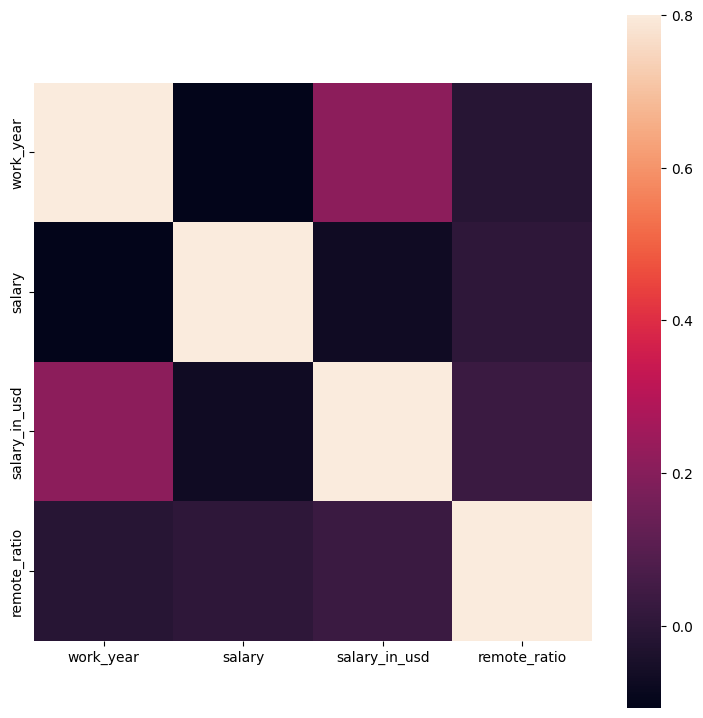

In [20]:
%matplotlib inline 
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True)

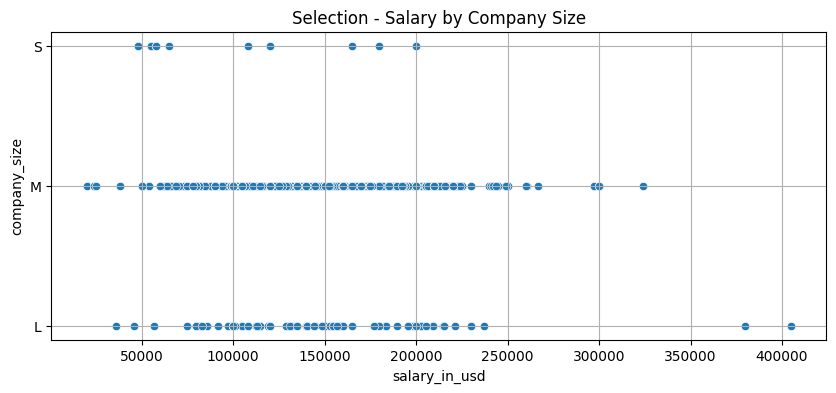

In [21]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=data_select, y='company_size', x='salary_in_usd')
plt.title('Selection - Salary by Company Size')
plt.grid()
plt.show()

## Dataset Pre_processing

In [22]:
data.drop('employment_type',axis=1,inplace=True)
data.drop('salary',axis=1,inplace=True)
data.drop('salary_currency',axis=1,inplace=True)
data.drop('employee_residence',axis=1,inplace=True)
data.drop('company_location',axis=1,inplace=True)
data.drop('job_title',axis=1,inplace=True)

In [23]:
data.head()

,work_year,experience_level,salary_in_usd,remote_ratio,company_size
0,2022,SE,200000,100,S
1,2022,EN,74378,100,L
2,2022,SE,165000,50,S
3,2022,EN,33599,50,L
4,2022,SE,185900,0,M


### Encoding dataset

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np

In [25]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [26]:
data.experience_level = data.experience_level.map({'SE':5,'EN':1.5,'MI':3.5,'EX':6.5})
data.company_size = data.company_size.map({'S':0,'M':1,'L':2})

In [27]:
data.head()

,work_year,experience_level,salary_in_usd,remote_ratio,company_size
0,2022,5.0,200000,100,0
1,2022,1.5,74378,100,2
2,2022,5.0,165000,50,0
3,2022,1.5,33599,50,2
4,2022,5.0,185900,0,1


# Perfroming Simple Linear Regression -->

Equation of linear regression

y = c + miti + m2t2+..

• y is the response

• c is the intercept

• mi is the coefficient for the first feature

• mn is the coefficient for the nth feature

In our case:

Y = c+ml x TV

The m values are called the model coefficients or model parameters.

Generic Steps in Model Building using sklearn

steps to build any model can be divided as follows:

Preparing X and y

• The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.

• However, X can be a dataframe as Pandas is built over NumPy.

In [28]:
import pandas as pd
dataset = pd.read_csv('salaries2.csv')
X_simple = dataset.iloc[:, :-1].values
y_simple = dataset.iloc[:,1].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=1/3, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
lregressor = LinearRegression()
lregressor.fit(X_train, y_train)

LinearRegression()

In [31]:
# Step 4: Make Prediction
y_pred = lregressor.predict(X_test)

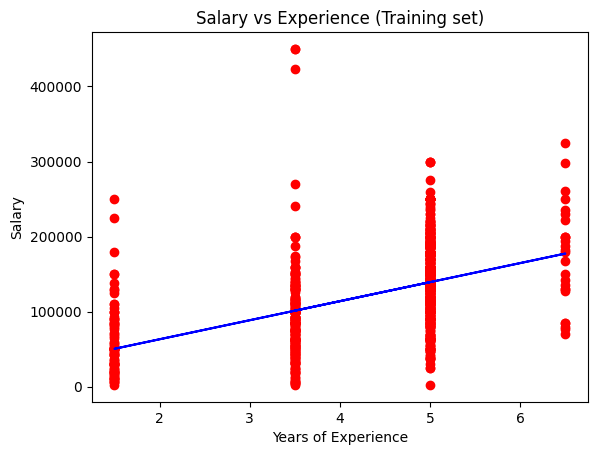

In [32]:
# Step 5 - Visualize training set results
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, lregressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

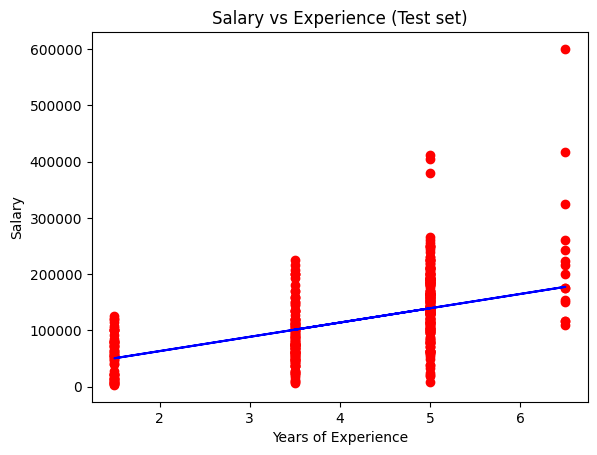

In [33]:
# Step 6 - Visualize test set results
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, lregressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [34]:
new_salary_pred = lregressor.predict([[15]])

In [35]:
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

The predicted salary of a person with 15 years experience is  [393124.42886897]


In [36]:
y_hat = lregressor.predict(X_simple)
y_hat

array([139297.04373506,  50457.45893819, 139297.04373506, ...,
        50457.45893819,  50457.45893819, 139297.04373506])

In [37]:
MAE = mean_absolute_error(y_simple, y_hat)
MSE = mean_squared_error(y_simple, y_hat)
RMSE = np.sqrt(mean_squared_error(y_simple, y_hat))


print("MAE: ",MAE, '\n',
     "MSE:",MSE, '\n',
     "RMsE: ",RMSE)


MAE:  42519.884371872475 
 MSE: 3270133028.506141 
 RMsE:  57185.07697385867


In [38]:
lregressor.score(X_simple,y_simple)

0.25963639433066743

# Random Forest Regression

In [39]:
import pandas as pd
dataset = pd.read_csv("salaries2.csv")
X_ranforrest = dataset.iloc[:, :-1].values
y_ranforrest = dataset.iloc[:, 1].values

In [40]:
from sklearn.ensemble import RandomForestRegressor
Rregressor = RandomForestRegressor(n_estimators=100, random_state=0)
Rregressor.fit(X_ranforrest, y_ranforrest)

RandomForestRegressor(random_state=0)

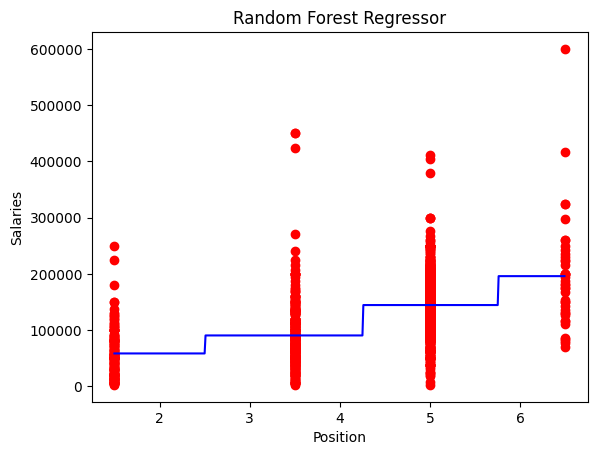

In [41]:

# Step 3 - Visualize
import matplotlib.pyplot as plt
import numpy as np
X_grid = np.arange(min(X_ranforrest), max(X_ranforrest), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X_ranforrest, y_ranforrest, color="red")
plt.plot(X_grid, Rregressor.predict(X_grid), color="blue")
plt.title("Random Forest Regressor")
plt.xlabel("Position")
plt.ylabel("Salaries")
plt.show()

In [42]:

# Step 4 - Predict
y_pred = Rregressor.predict([[6.5]])
print('The predicted salary of a person at 6.5 Level is ',y_pred)

The predicted salary of a person at 6.5 Level is  [195831.56039651]


In [43]:
y_ht = Rregressor.predict(X_ranforrest)
y_ht

array([144398.58700652,  58318.52553749, 144398.58700652, ...,
        58318.52553749,  58318.52553749, 144398.58700652])

In [44]:
MAE = mean_absolute_error(y_ranforrest, y_ht)
MSE = mean_squared_error(y_ranforrest, y_ht)
RMSE = np.sqrt(mean_squared_error(y_ranforrest, y_ht))


print("MAE: ",MAE, '\n',
     "MSE:",MSE, '\n',
     "RMsE: ",RMSE)


MAE:  41938.20287963572 
 MSE: 3204370295.1342983 
 RMsE:  56607.15763164848


# Decision tree Regression

In [45]:
import pandas as pd
dataset = pd.read_csv('salaries2.csv')
X_decision = dataset.iloc[:, :-1].values
y_decision = dataset.iloc[:,1].values

In [48]:
from sklearn.tree import DecisionTreeRegressor
Dregression = DecisionTreeRegressor(criterion="poisson")
Dregression.fit(X_decision, y_decision)

DecisionTreeRegressor(criterion='poisson')

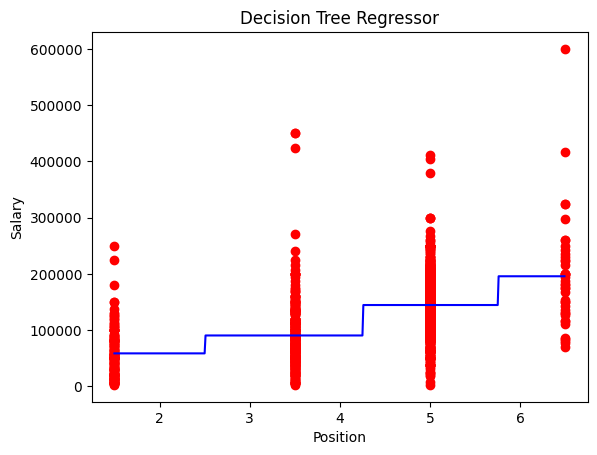

In [49]:
import matplotlib.pyplot as plt

import numpy as np
X_grid = np.arange(min(X_decision), max(X_decision), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X_decision, y_decision, color="red")
plt.plot(X_grid, Dregression.predict(X_grid), color="blue")
plt.title("Decision Tree Regressor")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()


In [50]:

# Step 4 - Predict
y_pred = Dregression.predict([[6.5]])
print('The predicted salary of a person at 6.5 Level is ',y_pred)

The predicted salary of a person at 6.5 Level is  [195607.41463415]


In [51]:
y_all = Dregression.predict(X_decision)
y_all

array([144448.01566952,  58445.35507246, 144448.01566952, ...,
        58445.35507246,  58445.35507246, 144448.01566952])

In [52]:
MAE = mean_absolute_error(y_decision, y_all)
MSE = mean_squared_error(y_decision, y_all)
RMSE = np.sqrt(mean_squared_error(y_decision, y_all))


print("MAE: ",MAE, '\n',
     "MSE:",MSE, '\n',
     "RMsE: ",RMSE)

MAE:  41939.41084792197 
 MSE: 3204364721.554397 
 RMsE:  56607.10840128117


# SVM Regression

In [53]:
print(dataset)

      experience_level  salary_in_usd
0                  5.0         200000
1                  1.5          74378
2                  5.0         165000
3                  1.5          33599
4                  5.0         185900
...                ...            ...
1190               5.0         412000
1191               3.5         151000
1192               1.5         105000
1193               1.5         100000
1194               5.0          94665

[1195 rows x 2 columns]


In [54]:
from sklearn.svm import SVR
regressor_svm = SVR(kernel = "rbf")
regressor_svm.fit(X_train, y_train)

SVR()

In [55]:
prediction = regressor_svm.predict(X_test)

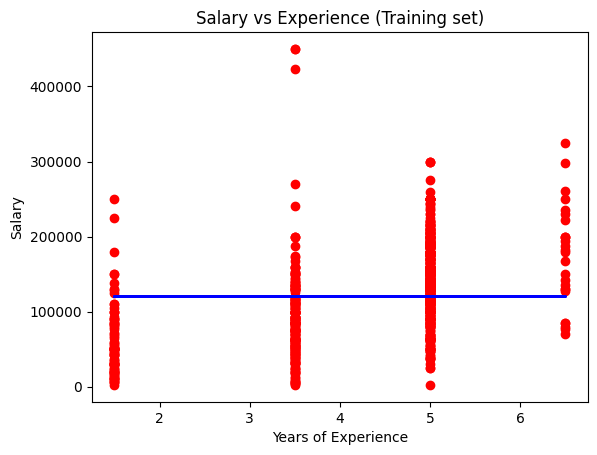

In [56]:
# Step 5 - Visualize training set results
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor_svm.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

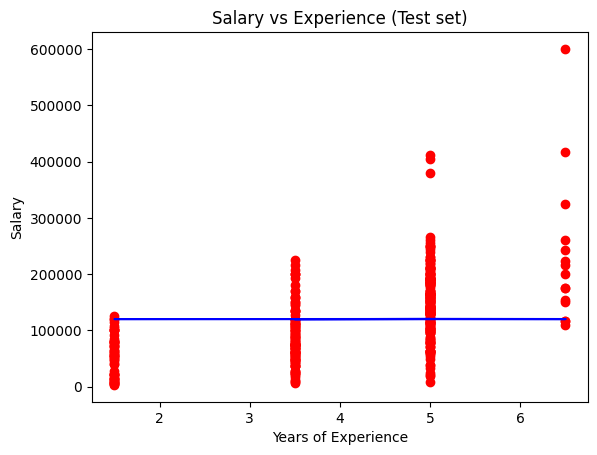

In [57]:
# Step 6 - Visualize test set results
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, regressor_svm.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [58]:
new_salary_pred = regressor_svm.predict([[10]])

In [59]:
print('The predicted salary of a person with 10 years experience is ',new_salary_pred)

The predicted salary of a person with 10 years experience is  [120081.99566567]


In [60]:
print("Mean Squared Error (MSE): ",mean_squared_error(y_test,prediction))

Mean Squared Error (MSE):  5267256690.103721


In [61]:
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test,prediction))

Mean Absolute Error (MAE) : 55688.48211442922


# ElasticNet Regression

In [62]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=1.0, l1_ratio = 0.5)

In [63]:
enet.fit(X_train,y_train)

ElasticNet()

In [64]:
y_Epredict = enet.predict(X_test)

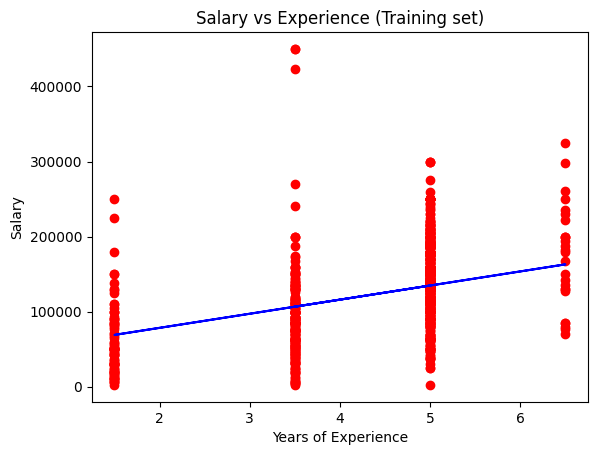

In [65]:
# Step 5 - Visualize training set results
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, enet.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

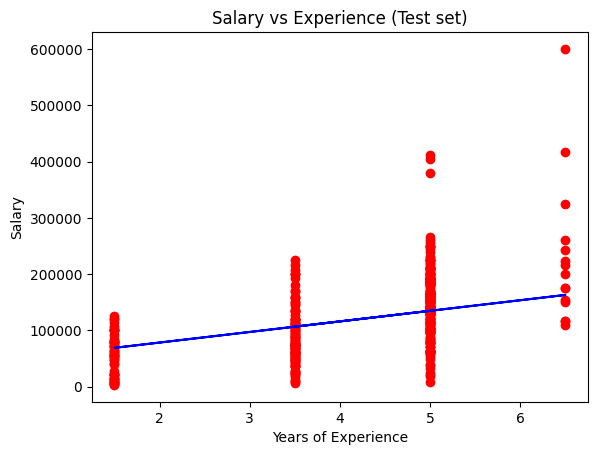

In [66]:
# Step 6 - Visualize test set results
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, enet.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [67]:
new_salary_pred = regressor_svm.predict([[15]])

In [68]:
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

The predicted salary of a person with 15 years experience is  [120081.99266934]


In [69]:
print("Mean Squared Error (MSE): ",mean_squared_error(y_test,y_Epredict))
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test,y_Epredict))
print("Root Mean Square Error: ",np.sqrt(mean_squared_error(y_test,y_Epredict)))

Mean Squared Error (MSE):  3869808369.5213313
Mean Absolute Error (MAE) : 45809.71656238816
Root Mean Square Error:  62207.78383386866
